Aqui, para fins de estudo, vamos utilizar apenas o algoritmo multilayer perceptron para regressão. Então, com o intuito de propor uma solução para esse problema, vamos seguir as seguintes etapas:

- Carregar e visualizar os primeiros registros do dataset para entender a estrutura;
- Verificar a necessidade de pré-processamento;
- Dividir a base de dados em treinamento e teste;
- Definir e treinar o modelo MLPRegressor;
- Fazer ponderações sobre os resultados.

In [1]:
import pandas as pd

file_path = '../input/insurance/insurance.csv'
df = pd.read_csv(file_path)

# Primeira 5 linhas do dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.shape

(1338, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Como não tem nenhum dado nulo, já descarta uma possível intervenção no pré-processamento

In [33]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


O dataset contém as seguintes colunas:

`age`: idade do beneficiário principal

`sex`: gênero do contratante do seguro

`bmi`: índice de massa corporal do contratante

`children`: número de dependentes

`smoker`: se o contratante é fumante ou não

`region`: região de residência do contratante

`charges`: valor cobrado pelo seguro saúde

As colunas sex, smoker, e region são categóricas e precisarão ser convertidas em numéricas. Além disso, para o treinamento do modelo de rede neural, pode ser benéfico normalizar ou padronizar as características numéricas.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Lista de colunas que contem dados categoricos e numericos
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=(numeric_features + 
                                                                      list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))))

X_train_preprocessed_df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.472227,-1.756525,0.734336,0.0,0.0,1.0,0.0,0.0
1,0.543313,-1.033082,-0.911192,0.0,0.0,0.0,0.0,0.0
2,0.898745,-0.943687,-0.911192,0.0,0.0,0.0,1.0,0.0
3,-0.025379,0.622393,3.202629,0.0,0.0,0.0,1.0,0.0
4,1.040918,-1.504893,1.557100,0.0,0.0,1.0,0.0,0.0


#### Importação de Módulos
- `StandardScaler`: Normaliza os dados numéricos para que tenham média 0 e desvio padrão 1. Algumas marcas de roupas podem usar números (como 40, 42, 44) e outras podem usar letras (P, M, G). O StandardScaler transforma todos os tamanhos em um padrão único para que a comparação seja justa. Para os dados, isso significa subtrair a média e dividir pelo desvio padrão para que a média dos dados transformados seja 0 e o desvio padrão seja 1.
- `OneHotEncoder`: Converte variáveis categóricas em uma forma numérica adequada para modelos de machine learning. Suponha que você tem um grupo de animais incluindo gatos, cachorros e pássaros. O OneHotEncoder cria uma coluna separada para cada tipo de animal e marca com um "1" a coluna que corresponde ao animal presente. Então, se você tem um gato, a coluna 'gato' teria um "1" e as colunas 'cachorro' e 'pássaro' teriam um "0".
- `ColumnTransformer`:  Permite que você aplique transformações diferentes (como normalização ou codificação one-hot) a diferentes colunas do seu conjunto de dados. É como se você pudesse dar instruções específicas para lidar com diferentes tipos de informações em um formulário.
- `Pipeline`: ajuda a conectar várias etapas de processamento e modelagem em uma linha de produção, cada etapa é realizada em sequência.

#### Transformadores
- `numeric_transformer`: Configurado para normalizar os dados numéricos.
- `categorical_transformer`: Configurado para transformar os dados categóricos em números usando one-hot encoding, evitando a multicolinearidade ao descartar uma das colunas resultantes. (Ali eu tenho 4 regiões, se uma das linhas não está em nenhuma de três regiões, ela com certeza está na quarta, de modo que a informação de uma das colunas de região é dispensável)

#### Pré-Processamento
- `preprocessor`: Aplica as transformações definidas acima às colunas correspondentes.

#### Divisão dos Dados
- `X` e `y`: As características e o alvo do nosso modelo, respectivamente.
- `X_train, X_test, y_train, y_test`: Conjuntos de dados de treino e teste.

#### Aplicação do Pré-Processamento
- `fit_transform`: O pré-processador aprende e transforma os dados de treino.
- `transform`: O pré-processador aplica a transformação aos dados de teste.

#### Conversão para DataFrame
- Os dados transformados são convertidos de volta em um formato de tabela para fácil análise.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from scipy.stats import randint
import numpy as np

hidden_layer_sizes = [tuple(randint.rvs(1, 201) for _ in range(num_layers)) for num_layers in randint.rvs(1, 5, size=10)]

param_distribs = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

mlp = MLPRegressor(max_iter=1000, random_state=42)

random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_distribs,
    n_iter=100,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5,
    random_state=42,
    error_score=np.nan
)

random_search.fit(X_train_preprocessed, y_train)


In [23]:
random_search.best_params_

{'solver': 'adam',
 'learning_rate_init': 0.001,
 'hidden_layer_sizes': (189, 199, 23),
 'alpha': 0.1,
 'activation': 'relu'}

In [24]:
mlp_regressor = mlp_regressor = MLPRegressor(
                    solver='adam',
                    learning_rate_init=0.001,
                    hidden_layer_sizes=(189, 199, 23),
                    alpha=0.1,
                    activation='relu',
                    batch_size='auto', 
                    learning_rate='adaptive',
                    max_iter=1000, 
                    tol=1e-5,
                    random_state=42,
                    verbose=True
                )

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', mlp_regressor)])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

Iteration 1, loss = 161219960.17914197
Iteration 2, loss = 161205697.80366290
Iteration 3, loss = 161182699.19484201
Iteration 4, loss = 161143614.18094781
Iteration 5, loss = 161078170.31512612
Iteration 6, loss = 160973036.70195267
Iteration 7, loss = 160810453.51273832
Iteration 8, loss = 160566378.51449054
Iteration 9, loss = 160207356.79557341
Iteration 10, loss = 159694515.10719034
Iteration 11, loss = 159001296.68360114
Iteration 12, loss = 158020300.14189988
Iteration 13, loss = 156731280.58207455
Iteration 14, loss = 155061132.49711609
Iteration 15, loss = 152896894.85693228
Iteration 16, loss = 150170001.15788347
Iteration 17, loss = 146825967.85626173
Iteration 18, loss = 142870364.35962200
Iteration 19, loss = 138001266.15274402
Iteration 20, loss = 132487064.52870874
Iteration 21, loss = 126163584.86927146
Iteration 22, loss = 118972352.79527062
Iteration 23, loss = 111025760.00207788
Iteration 24, loss = 102633242.06909257
Iteration 25, loss = 93978128.33494985
Iteration 

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Erro medio absoluto
mae = mean_absolute_error(y_test, y_pred)

# Calcula MSE e RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Calcula o R-quadrado (R²)
r2 = r2_score(y_test, y_pred)

# Exibe as métricas
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2425.825233512511
MSE: 18621273.660115257
RMSE: 4315.237381664566
R²: 0.8800552282702421


- MAE (Erro Médio Absoluto): O valor de 2425.82 está em torno de 20% do valor médio dos custos de seguro (13.270,42). Isso significa que, em média, as previsões do modelo estão desviando 2425.82 do valor real. Embora não seja um erro pequeno, é importante lembrar que em problemas de regressão, sobretudo com uma grande variação nos valores da variável alvo (como é o caso com a variável charges), um certo nível de erro é esperado.

- RMSE (Raiz do Erro Quadrático Médio): O valor de 4315.23 é aproximadamente 34% do valor médio dos custos de seguro. O RMSE dá uma ideia do erro padrão das previsões. Considerando que o desvio padrão dos custos de seguro é de 12.110,01, o RMSE é significativamente menor do que a variabilidade natural dos dados, o que é um sinal positivo.

- R² (R-quadrado): Um valor de 0.88 é bastante alto e indica que o modelo está explicando uma grande parte da variância dos dados. No entanto, é importante lembrar que R² não informa sobre a precisão das previsões em um nível absoluto.

#### Possíveis razões para o alto MAE e RMSE:
- Escalabilidade dos Custos de Seguro: Dado que a faixa dos custos de seguro é bastante ampla (de cerca de 1.121,87 a 63.770,43), é razoável esperar que a previsão exata de todos os valores seja desafiadora.

- Outliers: Se houver outliers nos custos de seguro, eles poderiam distorcer o MAE e o RMSE para cima, especialmente o RMSE, que é mais sensível a erros maiores devido ao quadrado dos erros.

- Complexidade do Modelo: O modelo pode não ser suficientemente complexo para capturar todas as nuances dos dados (o que é verdade) ou pode ser que esteja faltando algum recurso informativo que não está sendo considerado.

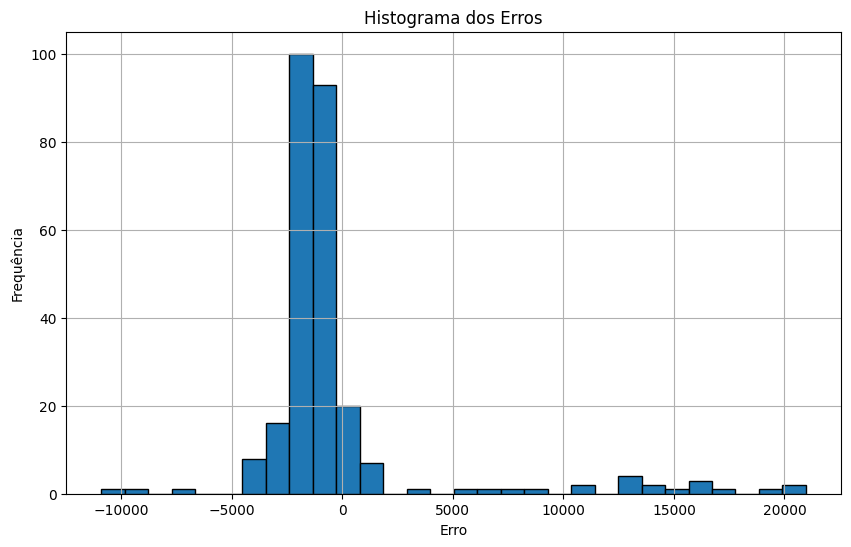

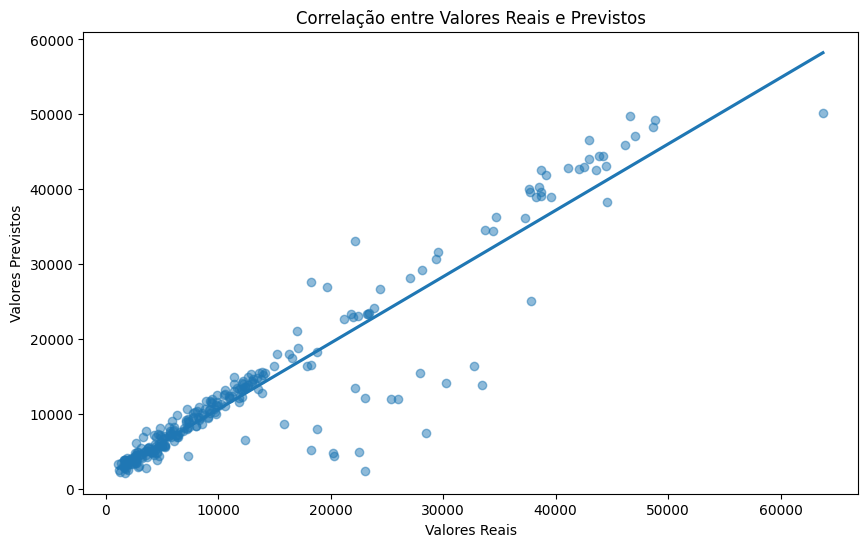

Coeficiente de correlação de Pearson: 0.94


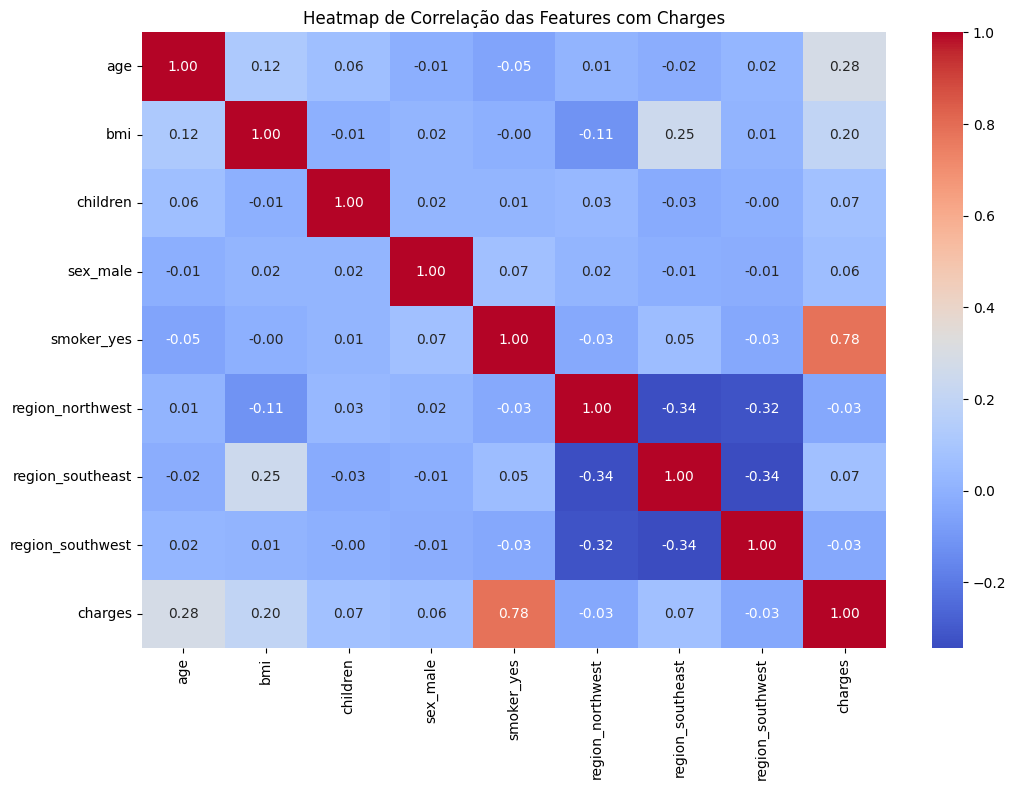

charges             1.000000
smoker_yes          0.780063
age                 0.281721
bmi                 0.197316
children            0.071885
region_southeast    0.067491
sex_male            0.056802
region_northwest   -0.033776
region_southwest   -0.034994
Name: charges, dtype: float64


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

errors = y_test - y_pred

plt.figure(figsize=(10,6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Histograma dos Erros')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={'alpha': 0.5})
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Correlação entre Valores Reais e Previstos')
plt.show()

corr_coef, _ = pearsonr(y_test, y_pred)
print(f"Coeficiente de correlação de Pearson: {corr_coef:.2f}")

X_train_preprocessed_df['charges'] = y_train.values

correlation_matrix = X_train_preprocessed_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlação das Features com Charges')
plt.show()

charges_correlations = correlation_matrix['charges'].sort_values(ascending=False)
print(charges_correlations)